# Analisi della MD

Importiamo una serie di moduli per comodità.

In [1]:
# coding: utf-8
from ase.io import read
from ase.io.trajectory import Trajectory
import numpy as np
from scipy.fftpack import fft
from scipy.constants import h, eV
import matplotlib.pyplot as plt
from pdos import pyvacf

Leggiamo le posizioni, calcoliamo la velocità e con questa la funzione di autocorrelazione.

In [2]:
tr = Trajectory('md_300.traj')
dt = 10 * 4.8378e-17 # s

# Collect positions
poss = np.zeros([len(tr),36,3])
for i in range(len(tr)):
    poss[i] = tr[i].get_positions()
    
# Compute velocities
v = np.diff(poss*1e-10,axis=0)/dt

# Compute velocity autocorrelation function (skip first 100 step to reach equilibrium)
vacf = pyvacf(v[100:], m=tr[0].get_masses())

# (possibly) Show it
#plt.plot(vacf)
#plt.show()

Trasformiamo e grafichiamo.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


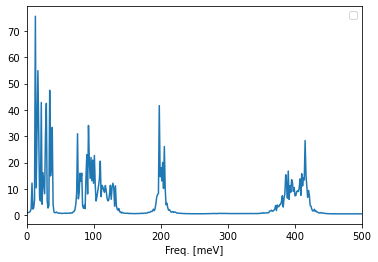

In [3]:
# Fourier transmorm it
fft_vacf = fft(vacf)

full_faxis = np.fft.fftfreq(fft_vacf.shape[0], dt)
full_pdos = np.real(fft_vacf)

# Get positive side
split_idx = len(full_faxis)//2
faxis = full_faxis[:split_idx]
pdos = full_pdos[:split_idx]

plt.plot(1000 * faxis * h / eV, pdos)
plt.xlabel('Freq. [meV]')
plt.xlim([0,500])
plt.legend()